# <center>Challenge 2<center>

<p>Team Name: Martin-Mire-Crawford
<p>Student Names: Kyle Martin, Allen Mire, Garret Crawford
<p>Student W#s: W0470161, W0445696, W0682298 

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [1]:
#Pip command to install plotly for the parallel coordinate plot

!pip install plotly -q
!pip install kaleido -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.random import normal
from numpy.random import uniform
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
import plotly.express as px
import os

#Using a Random State set to due date to make sure results are repeatable
rng = np.random.RandomState(10102021)
rng.rand(5)

array([0.22676271, 0.64241374, 0.86038894, 0.45149655, 0.54404328])

## Prepare Data

I. Normal distribution (Mean=10, Var=4)

In [3]:
#Generate a random Normally Dist. set of data with mean 10, Var 4, and 100 elements
normalDist = np.sort(rng.normal(loc=10, scale= math.sqrt(4), size = 100))

#Create an array of Quantile values for above data set at 10%, 25%, 50%, and 75%
normalDistQuantiles = np.array([np.quantile(normalDist, .10),
                              np.quantile(normalDist, .25),
                             np.quantile(normalDist, .50),
                             np.quantile(normalDist, .75),])

II. Uniform distribution of range [4, 16]

In [4]:
#Generate a random uniformly Dist. set of data with lowest value at 4, highest value at 16, and 100 elements
uniformDist = np.sort(rng.uniform(low=4, high=16, size = 100))

#Create an array of Quantile values for above data set at 10%, 25%, 50%, and 75%
uniformDistQuantiles = np.array([np.quantile(uniformDist, .10),
                              np.quantile(uniformDist, .25),
                             np.quantile(uniformDist, .50),
                             np.quantile(uniformDist, .75),])

# Q-Q Plot

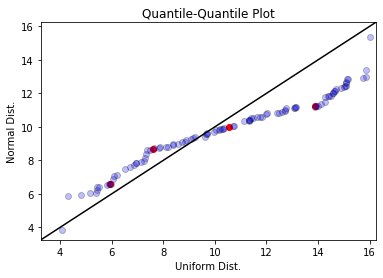

In [5]:
fig, ax = plt.subplots()
pp_x = sm.ProbPlot(normalDist)
pp_y = sm.ProbPlot(uniformDist)
ax.scatter(uniformDistQuantiles, normalDistQuantiles, c='red') #adds markers for specified Quantiles
qq = pp_x.qqplot(markerfacecolor='blue', markeredgecolor='k', alpha=0.25, other= pp_y, ax=ax)
sm.qqline(qq.axes[0], line='45', fmt='k-')
plt.xlabel('Uniform Dist.')
plt.ylabel('Normal Dist.')
plt.title("Quantile-Quantile Plot")
plt.show()

## Analysis of Outcome

Since the points on the QQ plot do not lie on the 45 degree reference line we can assume that the two data sets are from different distributions

# Parallel-Coordinates Plot

In [5]:
#Create Data frame using given data
df = pd.DataFrame(np.array([[50, 160, 5], [25, 130, 6], [30, 200, 4], 
                            [65, 150, 4.5], [55, 170, 5.2], [75, 165, 4.8], 
                            [45, 180, 5.8], [70, 190, 4.8], [40, 200, 5.8]]),
                   columns=['age', 'weight', 'height'])

#Create parallel - coordinates plot
fig = px.parallel_coordinates(df, color="age")
fig.show()

if not os.path.exists("./images"):
    os.mkdir("./images")

fig.write_image("./images/parallel_plot.png")

## Analysis of Outcome

I. Age-Height: There appears to be a negative correlation between age and height with the exception of one outlier.

II. Age-Weight: Age and weight also seem to be negatively correlated again with the exception of one outlier.

III. Height-Weight: The correlation between height and weight is less clear than in the previous two examples since there are more than one outliers, but in general there seems to be a positive correlation between height and weight.